# Project Overview

We are given a license dataset which holds various information related to a business license. The objective is to predict license status for the given business.

Project Plan    
1. Setup environment
    - install requirements
    - import required packages
    - import and read data
2. Data Exploration
3. Feature Selection
4. Model building
5. Model Evaluation
6. Results

# Setup environment

Install requirements

In [1]:
! pip install category_encoders --quiet

You should consider upgrading via the '/Users/saili/Library/CloudStorage/OneDrive-GeorgeMasonUniversity-O365Production/Bag/projects/ml/.env/bin/python3 -m pip install --upgrade pip' command.


In [92]:
! pip install xgboost --quiet

You should consider upgrading via the '/Users/saili/Library/CloudStorage/OneDrive-GeorgeMasonUniversity-O365Production/Bag/projects/ml/.env/bin/python3 -m pip install --upgrade pip' command.


In [111]:
! pip install hyperopt --quiet

You should consider upgrading via the '/Users/saili/Library/CloudStorage/OneDrive-GeorgeMasonUniversity-O365Production/Bag/projects/ml/.env/bin/python3 -m pip install --upgrade pip' command.


Import packages

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as cat_enc
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from xgboost import XGBClassifier
from hyperopt import hp, fmin, tpe, Trials

Import data

In [3]:
df = pd.read_csv("../input/license.csv")
df.head()

/var/folders/nt/h1n768v954b6xdhvrsg59fl80000gn/T/ipykernel_10490/4196120087.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../input/license.csv")


,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,...,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,...,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,...,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,...,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,...,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


# Data exploration

Shape of the data

In [4]:
df.shape

(85895, 32)

(85895, 32)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   site_number                        85895 non-null  int64  
 1   legal_name                         85895 non-null  object 
 2   doing_business_as_name             85894 non-null  object 
 3   city                               85895 non-null  object 
 4   state                              85895 non-null  object 
 5   zip_code                           85864 non-null  object 
 6   ward                               36194 non-null  float64
 7   precinct                           29194 non-null  float64
 8   ward_precinct                      36195 non-null  object 
 9   police_district                    31883 non-null  float64
 10  license_code                       85895 non-null  int64  
 11  license_description                85895 non-null  obj

In [8]:
df.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE',
       'APPLICATION CREATED DATE', 'APPLICATION REQUIREMENTS COMPLETE',
       'PAYMENT DATE', 'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'LICENSE STATUS'],
      dtype='object')

Change the columns names by replacing " " with _

In [9]:
df.columns = [col.replace(" ", "_").lower() for col in df.columns]
df.columns

Index(['id', 'license_id', 'account_number', 'site_number', 'legal_name',
       'doing_business_as_name', 'address', 'city', 'state', 'zip_code',
       'ward', 'precinct', 'ward_precinct', 'police_district', 'license_code',
       'license_description', 'license_number', 'application_type',
       'application_created_date', 'application_requirements_complete',
       'payment_date', 'conditional_approval', 'license_term_start_date',
       'license_term_expiration_date', 'license_approved_for_issuance',
       'date_issued', 'license_status_change_date', 'ssa', 'latitude',
       'longitude', 'location', 'license_status'],
      dtype='object')

Check: Missing values

In [10]:
df.isnull().sum()

id                                       0
license_id                               0
account_number                           0
site_number                              0
legal_name                               0
doing_business_as_name                   1
address                                  0
city                                     0
state                                    0
zip_code                                31
ward                                 49701
precinct                             56701
ward_precinct                        49700
police_district                      54012
license_code                             0
license_description                      0
license_number                           1
application_type                         0
application_created_date             64660
application_requirements_complete      214
payment_date                          1289
conditional_approval                     0
license_term_start_date                228
license_ter

Yes

Drop irrelevant features

In [11]:
drop_col_list = [
    'id',
    'license_id',
    'ssa',
    'location',
    'application_created_date',
    'account_number',
    'address'
]

df.drop(drop_col_list, axis=1, inplace=True)

Data transformation

Update license status change date feature

In [15]:
df["license_status_change"] = np.where(df.license_status_change_date.isnull(), 1, 0)
df["license_status_change"].head()

0    1
1    0
2    1
3    1
4    1
Name: license_status_change, dtype: int64

In [16]:
pd.crosstab(df.license_status_change, df.license_status)

license_status,AAC,AAI,INQ,REA,REV
license_status_change,,,,,
0,30200,0,2,3,290
1,0,55400,0,0,0


Convert String object into date

In [19]:
df.application_requirements_complete = pd.DatetimeIndex(df.application_requirements_complete)
df.payment_date = pd.DatetimeIndex(df.payment_date)
df.license_term_start_date = pd.DatetimeIndex(df.license_term_start_date)
df.license_term_expiration_date = pd.DatetimeIndex(df.license_term_expiration_date)
df.license_approved_for_issuance = pd.DatetimeIndex(df.license_approved_for_issuance)
df.date_issued = pd.DatetimeIndex(df.date_issued)

In [24]:
df.license_status_change_date = pd.DatetimeIndex(df.license_status_change_date)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   site_number                        85895 non-null  int64         
 1   legal_name                         85895 non-null  object        
 2   doing_business_as_name             85894 non-null  object        
 3   city                               85895 non-null  object        
 4   state                              85895 non-null  object        
 5   zip_code                           85864 non-null  object        
 6   ward                               36194 non-null  float64       
 7   precinct                           29194 non-null  float64       
 8   ward_precinct                      36195 non-null  object        
 9   police_district                    31883 non-null  float64       
 10  license_code                      

# Feature selection

In [29]:
df["completion_to_start"] = (df.license_term_start_date - df.application_requirements_complete).dt.days
df["start_to_expiry"] = (df.license_term_expiration_date - df.license_term_start_date).dt.days
df["approval_to_issuance"] = (df.date_issued - df.license_approved_for_issuance).dt.days
df["completion_to_payment"] = (df.payment_date - df.application_requirements_complete).dt.days

In [30]:
df["presence_of_enquiry_details"] = np.where(df.ward.isnull() | df.ward_precinct.isnull() | df.police_district | df.precinct, 0, 1)
df["target"] = df[['license_status']].apply(lambda col:pd.Categorical(col).codes)

In [33]:
len(df.city.unique())

1223

In [34]:
enc = cat_enc.OneHotEncoder().fit(df.target.astype(str))
y_onehot = enc.transform(df.target.astype(str))
y_onehot.columns

Index(['target_1', 'target_2', 'target_3', 'target_4', 'target_5'], dtype='object')

In [35]:
class_names = y_onehot.columns
for class_ in class_names:
    enc = cat_enc.TargetEncoder(smoothing=0)
    temp = enc.fit_transform(df[['license_description', 'state', 'city']], y_onehot[class_])
    temp.columns = [str(x) + '_' + str(class_) for x in temp.columns]
    df = pd.concat([df, temp], axis=1)

In [37]:
df.license_status.value_counts()

license_status
AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: count, dtype: int64

In [38]:
df.license_status.value_counts(normalize=True).mul(100).round(3).astype(str) + "%"

license_status
AAI    64.497%
AAC    35.159%
REV     0.338%
REA     0.003%
INQ     0.002%
Name: proportion, dtype: object

Oversampling / Undersampling

In [39]:
np.sort(df.target.unique()).tolist()

[0, 1, 2, 3, 4]

In [40]:
# undersampling
df_0 = df[df.target == 0].sample(frac=0.3, replace=False)
df_1 = df[df.target == 1].sample(frac=0.3, replace=False)

# oversampling
df_2 = df[df.target == 2].sample(frac=200, replace=True)
df_3 = df[df.target == 3].sample(frac=100, replace=True)
df_4 = df[df.target == 4].sample(frac=2, replace=True)

sampled_df = pd.concat([df_0, df_1, df_2, df_3, df_4])
sampled_df.target.value_counts()

target
1    16620
0     9060
4      580
2      400
3      300
Name: count, dtype: int64

# Model building

In [42]:
X = sampled_df[['latitude', 'longitude',
       'completion_to_start',
       'start_to_expiry', 'approval_to_issuance', 'completion_to_payment',
       'presence_of_enquiry_details',  'license_description_target_1',
       'state_target_1', 'city_target_1', 'license_description_target_2',
       'state_target_2', 'city_target_2', 'license_description_target_3',
       'state_target_3', 'city_target_3', 'license_description_target_4',
       'state_target_4', 'city_target_4', 'license_description_target_5',
       'state_target_5', 'city_target_5']]

y = sampled_df['target']

Mean imputation of X

In [43]:
X = X.fillna(X.mean())

Train/test preparation

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

KNN

In [47]:
knn = KNeighborsClassifier(n_neighbors=3)
knn

KNeighborsClassifier(n_neighbors=3)

Scaling

In [48]:
scaler = MinMaxScaler()
scaler.fit(X_train)
knn.fit((scaler.transform(X_train)), y_train)
scaler.fit(X_test)
y_pred = knn.predict(scaler.transform(X_test))

Metrics Performance

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74       918
           1       0.83      0.92      0.87      1653
           2       0.00      0.00      0.00        47
           3       1.00      0.64      0.78        25
           4       0.61      0.51      0.56        53

    accuracy                           0.82      2696
   macro avg       0.65      0.55      0.59      2696
weighted avg       0.80      0.82      0.81      2696



/Users/saili/Library/CloudStorage/OneDrive-GeorgeMasonUniversity-O365Production/Bag/projects/ml/.env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saili/Library/CloudStorage/OneDrive-GeorgeMasonUniversity-O365Production/Bag/projects/ml/.env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saili/Library/CloudStorage/OneDrive-GeorgeMasonUniversity-O365Production/Bag/projects/ml/.env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Prec

Logistic Regression

In [53]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

/Users/saili/Library/CloudStorage/OneDrive-GeorgeMasonUniversity-O365Production/Bag/projects/ml/.env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics performance

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.31      0.40       918
           1       0.68      0.90      0.77      1653
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        25
           4       1.00      0.02      0.04        53

    accuracy                           0.66      2696
   macro avg       0.45      0.25      0.24      2696
weighted avg       0.63      0.66      0.61      2696



In [55]:
print(confusion_matrix(y_test, y_pred))

[[ 283  635    0    0    0]
 [ 158 1493    1    1    0]
 [   0   47    0    0    0]
 [  19    6    0    0    0]
 [  26   26    0    0    1]]


Naive Bayes

In [57]:
naive_bayes = GaussianNB()
y_pred = naive_bayes.fit(X_train, y_train).predict(X_test)

Metrics performance

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.50      0.56       918
           1       0.91      0.84      0.87      1653
           2       1.00      1.00      1.00        47
           3       0.23      1.00      0.37        25
           4       0.11      0.66      0.19        53

    accuracy                           0.72      2696
   macro avg       0.58      0.80      0.60      2696
weighted avg       0.80      0.72      0.75      2696



In [59]:
print(confusion_matrix(y_test, y_pred))

[[ 457  139    0   74  248]
 [ 239 1382    0    6   26]
 [   0    0   47    0    0]
 [   0    0    0   25    0]
 [  12    0    0    6   35]]


Decision Tree

In [61]:
dtree = DecisionTreeClassifier(random_state=0)
y_pred = dtree.fit(X_train, y_train).predict(X_test)

Metrics Performance

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       918
           1       0.89      0.89      0.89      1653
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        25
           4       0.67      0.92      0.78        53

    accuracy                           0.85      2696
   macro avg       0.87      0.92      0.89      2696
weighted avg       0.85      0.85      0.85      2696



In [63]:
print(confusion_matrix(y_test, y_pred))

[[ 716  181    0    0   21]
 [ 186 1464    0    0    3]
 [   0    0   47    0    0]
 [   0    0    0   25    0]
 [   4    0    0    0   49]]


# Model Evaluation

Feature importance

In [82]:
def feature_imp(model_feature_imp):
    """This function plots feature importance based on the model
    """
    import pandas as pd
    import seaborn as sns
    fimp = pd.DataFrame([X_train.columns, model_feature_imp])
    fimp = fimp.T.sort_values(by=1, ascending=False)[1:10]

    # plot
    sns.barplot(x=fimp[1], y=fimp[0])
    plt.xlabel("Feature Importance score")
    plt.ylabel("Features")
    plt.title("Visualizing Important features")
    plt.legend()
    plt.show()

    return

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


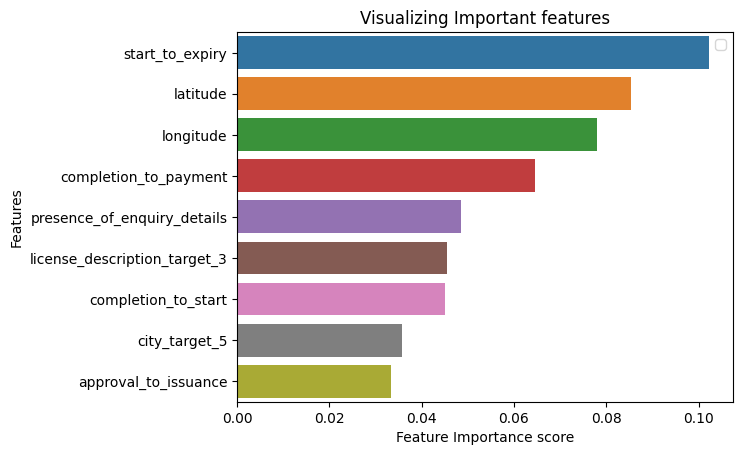

In [83]:
feature_imp(dtree.feature_importances_)

Random Forest

In [85]:
rf = RandomForestClassifier(random_state=1)
y_pred = rf.fit(X_train, y_train).predict(X_test)

Metrics Performance

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       918
           1       0.92      0.91      0.91      1653
           2       1.00      1.00      1.00        47
           3       0.96      1.00      0.98        25
           4       0.83      0.91      0.86        53

    accuracy                           0.89      2696
   macro avg       0.91      0.93      0.92      2696
weighted avg       0.89      0.89      0.89      2696



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


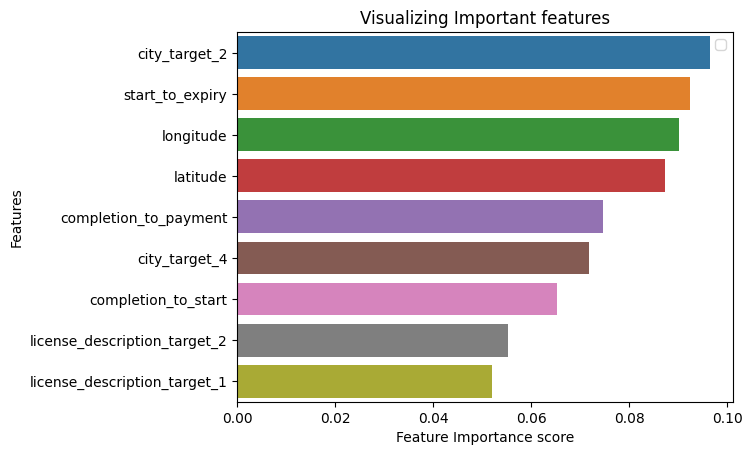

In [87]:
feature_imp(rf.feature_importances_)

AdaBoost

In [89]:
ada_boost = AdaBoostClassifier(random_state=0)
ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)

Metrics Performance

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76       918
           1       0.91      0.81      0.86      1653
           2       0.82      1.00      0.90        47
           3       1.00      0.36      0.53        25
           4       0.27      0.15      0.19        53

    accuracy                           0.81      2696
   macro avg       0.74      0.63      0.65      2696
weighted avg       0.82      0.81      0.81      2696



XGBoost

In [94]:
xg_boost = XGBClassifier(random_state = 1)
xg_boost.fit(X_train, y_train)
y_pred = xg_boost.predict(X_test)

Metrics Performance

In [95]:
print(f1_score(y_test, y_pred, average='macro'))

0.9163027773397516


In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       918
           1       0.92      0.92      0.92      1653
           2       1.00      1.00      1.00        47
           3       0.96      1.00      0.98        25
           4       0.83      0.83      0.83        53

    accuracy                           0.90      2696
   macro avg       0.91      0.92      0.92      2696
weighted avg       0.90      0.90      0.90      2696



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


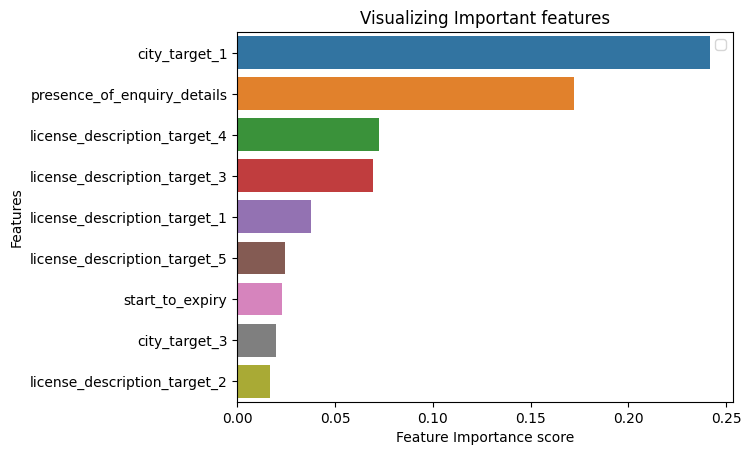

In [97]:
feature_imp(xg_boost.feature_importances_)

Hyperparameter tuning     
- Number of trees
- depth of the trees
- minimum number of samples in the leaf node
- maximum number of features
- split criterion

Random forest

In [99]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 10]

In [100]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
}

In [101]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=110, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1400; total time=   0.0s
[CV] END max_depth=110, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1400; total time=   0.0s
[CV] END max_depth=110, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1400; total time=   0.0s
[CV] END max_depth=110, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=400; total time=   0.0s
[CV] END max_depth=110, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=400; total time=   0.0s
[CV] END max_depth=110, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=400; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   3.4s
[CV] END max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=

/Users/saili/Library/CloudStorage/OneDrive-GeorgeMasonUniversity-O365Production/Bag/projects/ml/.env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/saili/Library/CloudStorage/OneDrive-GeorgeMasonUniversity-O365Production/Bag/projects/ml/.env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/saili/Library/CloudStorage/OneDrive-GeorgeMasonUniversity-O365Production/Bag/projects/ml/.env/lib/python3.9/site-packages/sk

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [102]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80}

In [105]:
rf_tuned = RandomForestClassifier(**rf_random.best_params_)
rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)

Metrics performance

In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       918
           1       0.92      0.91      0.91      1653
           2       1.00      1.00      1.00        47
           3       0.96      1.00      0.98        25
           4       0.84      0.72      0.78        53

    accuracy                           0.89      2696
   macro avg       0.91      0.90      0.90      2696
weighted avg       0.89      0.89      0.89      2696



In [108]:
param_grid = {
    'max_depth': [50, 100, 150, None],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [2, 4, 5, 6],
    'n_estimators': [50, 100, 150, 200]
}

In [109]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=150; total time=   3.2s
[CV] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=150; total time=   3.3s
[CV] END max_depth=50, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   1.1s
[CV] END max_depth=50, min_sampl

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [50, 100, 150, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [2, 4, 5, 6],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=2)

In [110]:
grid_search.best_params_

{'max_depth': 50,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [112]:
rf_grid_tuned = RandomForestClassifier(**grid_search.best_params_)
rf_grid_tuned.fit(X_train, y_train)
y_pred = rf_grid_tuned.predict(X_test)

Metrics Performance

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       918
           1       0.92      0.91      0.91      1653
           2       1.00      1.00      1.00        47
           3       0.96      1.00      0.98        25
           4       0.84      0.68      0.75        53

    accuracy                           0.89      2696
   macro avg       0.91      0.89      0.90      2696
weighted avg       0.89      0.89      0.89      2696



In [115]:
param_grid_space = {
    'max_depth': hp.quniform("max_depth", 3, 18, 1),
    'gamma': hp.uniform ('gamma', 1,9),
    'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
    'reg_lambda' : hp.uniform('reg_lambda', 0,1),
    'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
    'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
    'n_estimators': 180
}

In [116]:
def optimize(param_grid_space):
    xgbm = XGBClassifier(n_estimators=param_grid_space['n_estimators'], max_depth= int(param_grid_space['max_depth']),
                         gamma=param_grid_space['gamma'])
    xgbm.fit(X_train, y_train)
    y_pred = xgbm.predict(X_test)
    f1score = f1_score(y_test, y_pred, average="macro")
    
    return -1*f1score

In [118]:
trail = Trials()
result = fmin(fn=optimize, space=param_grid_space, max_evals=3, trials=trail, algo=tpe.suggest)


100%|██████████| 3/3 [00:30<00:00, 10.07s/trial, best loss: -0.9115169863802268]


In [119]:
result

{'colsample_bytree': 0.8799270057298496,
 'gamma': 2.4778215252883395,
 'max_depth': 12.0,
 'min_child_weight': 0.0,
 'reg_alpha': 124.0,
 'reg_lambda': 0.9446684860539172}

In [120]:
result['max_depth'] = int(result['max_depth'])

In [121]:
xg_tuned = XGBClassifier(**result)
xg_tuned.fit(X_train, y_train)
y_pred = xg_tuned.predict(X_test)

In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       918
           1       0.91      0.89      0.90      1653
           2       1.00      1.00      1.00        47
           3       0.94      0.64      0.76        25
           4       0.82      0.26      0.40        53

    accuracy                           0.86      2696
   macro avg       0.89      0.73      0.77      2696
weighted avg       0.86      0.86      0.86      2696

